In [1]:
import pandas as pd
from ms_pred.common.plot_utils import *

set_style()

In [2]:
%cd ~/ms-pred

/mnt/c/Users/runzh/OneDrive/Documents/2023/ms-pred


# Fig 3 Kinetic plots on carbendazim

In [3]:
kinetics_df = pd.read_csv('data/exp_specs/pesticide/peak_area_table_919_sample_info.csv')

days = kinetics_df['Time (days)'].unique()
days.sort()

In [4]:
t0_df = kinetics_df[kinetics_df['Time (days)'] == 0]
t0_mean, t0_std = np.mean(t0_df['Normalized Peak Area']), np.std(t0_df['Normalized Peak Area'])

In [5]:
light_data = [[t0_mean], [t0_std]]
dark_data = [[t0_mean], [t0_std]]
for day in days[1:]:
    tmp_df = kinetics_df[kinetics_df['Time (days)'] == day]
    light_df = tmp_df[tmp_df['Conditions'] == 'Light']
    light_np = light_df['Normalized Peak Area'].to_numpy()
    if len(light_np) < 3:
        light_np = np.concatenate((light_np, np.zeros(3 - len(light_np))))
    light_data[0].append(np.mean(light_np))
    light_data[1].append(np.std(light_np))

    dark_df = tmp_df[tmp_df['Conditions'] == 'Dark']
    dark_np = dark_df['Normalized Peak Area'].to_numpy()
    dark_np = np.concatenate((dark_np, np.zeros(3 - len(dark_np))))
    dark_data[0].append(np.mean(dark_np))
    dark_data[1].append(np.std(dark_np))
light_data = np.array(light_data)
dark_data = np.array(dark_data)

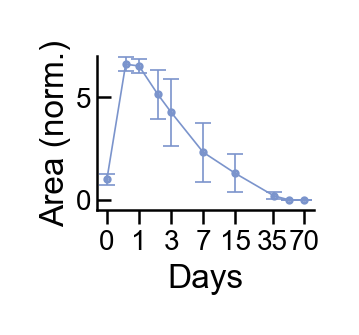

In [6]:
plt.figure(figsize=(.7, 0.5), dpi=400)
_, caps, _ = plt.errorbar(
    days + 1, light_data[0] / t0_mean, yerr=light_data[1] / t0_mean,
    fmt='-o', markersize=0.5, capsize=1.5, color='#7B94CC', linewidth=0.3
)
for cap in caps:
    cap.set_markeredgewidth(0.3)

# set axis ticks and labels
ax = plt.gca()
ax.set_xscale('log')
ax.xaxis.set_ticks(np.array([0, 1, 3, 7, 15, 35, 70]) +1)
ax.set_xticklabels([0, 1, 3, 7, 15, 35, 70])
ax.xaxis.set_ticks([], minor=True)
plt.ylabel('Area (norm.)')
ax.yaxis.set_label_coords(-0.12, 0.5)
plt.xlabel("Days")
ax.xaxis.set_label_coords(0.5, -0.35)
ax.set_ylim(-0.5, 7)

# remove box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("results/figs_iceberg/919_light_kinetics.pdf", bbox_inches="tight", transparent=True)

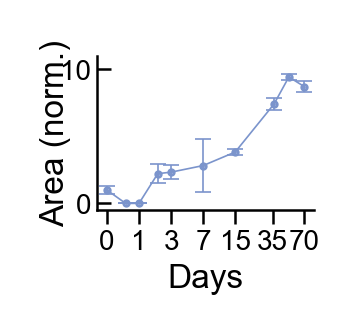

In [7]:
plt.figure(figsize=(.7, 0.5), dpi=400)
_, caps, _ = plt.errorbar(
    days + 1, dark_data[0] / t0_mean, yerr=dark_data[1] / t0_mean,
    fmt='-o', markersize=0.5, capsize=1.5, color='#7B94CC', linewidth=0.3
)

for cap in caps:
    cap.set_markeredgewidth(0.3)

# set axis ticks and labels
ax = plt.gca()
ax.set_xscale('log')
ax.xaxis.set_ticks(np.array([0, 1, 3, 7, 15, 35, 70]) +1)
ax.set_xticklabels([0, 1, 3, 7, 15, 35, 70])
ax.xaxis.set_ticks([], minor=True)
plt.ylabel('Area (norm.)')
ax.yaxis.set_label_coords(-0.12, 0.5)
plt.xlabel("Days")
ax.xaxis.set_label_coords(0.5, -0.35)
ax.set_ylim(-0.5, 11)

# remove box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("results/figs_iceberg/919_dark_kinetics.pdf", bbox_inches="tight", transparent=True)